In [1]:
# importing necessary libraries
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from scipy import sparse
from scipy.sparse import random
from scipy import stats
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
# importing algorithm functions
import sys
sys.path.insert(1, '/Users/jennytran/Documents/GitHub/gko-23/scripts/functions')
from method import method

### Experiment 1: Gaussian System

$X \sim \mathcal{N}(0,\,1)$

In [3]:
# setting up data
A = np.random.randn(5000,500)
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [4]:
# gk
gk_start_cyclic_gauss = process_time()
gk_gaussian = method(A,x,y,'GK', 0.5*10**-8)
gk_stop_cyclic_gauss = process_time()
# gko
gko_start_cyclic_gauss = process_time()
gko_gaussian = method(A,x,y,'GKO', 0.5*10**-8)
gko_stop_cyclic_gauss = process_time()
# mwrko
mwrko_start_cyclic_gauss = process_time()
mwrko_gaussian = method(A,x,y,'MWRKO', 0.5*10**-8)
mwrko_stop_cyclic_gauss = process_time()

In [5]:
# cpu data
gk_cpu_gauss = gk_stop_cyclic_gauss - gk_start_cyclic_gauss
gko_cpu_gauss = gko_stop_cyclic_gauss - gko_start_cyclic_gauss
mwrko_cpu_gauss = mwrko_stop_cyclic_gauss - mwrko_start_cyclic_gauss

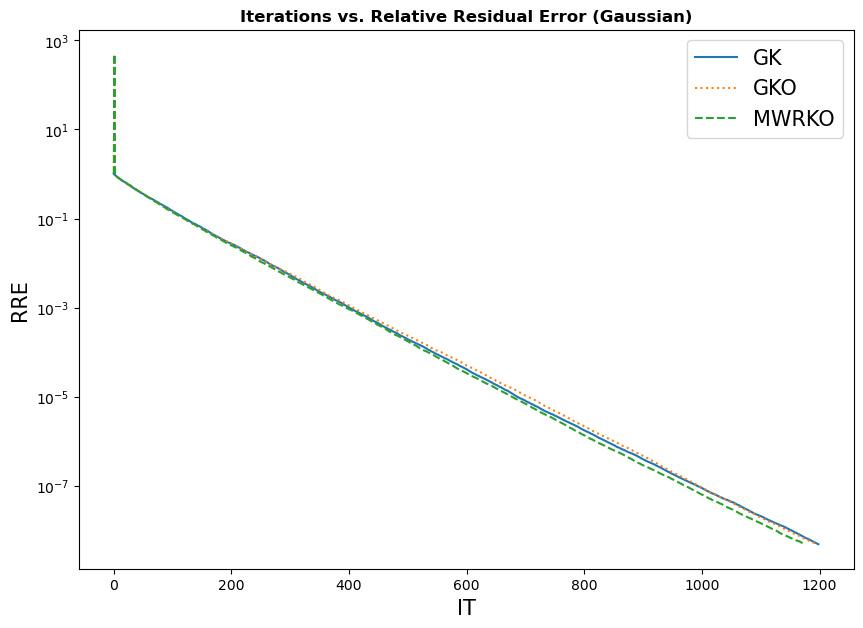

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('IT', fontsize = 15)
plt.ylabel('RRE', fontsize = 15)
plt.title('Iterations vs. Relative Residual Error (Gaussian)', fontweight="bold")
plt.legend(fontsize="15")
plt.show()
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-gauss-iter.png')

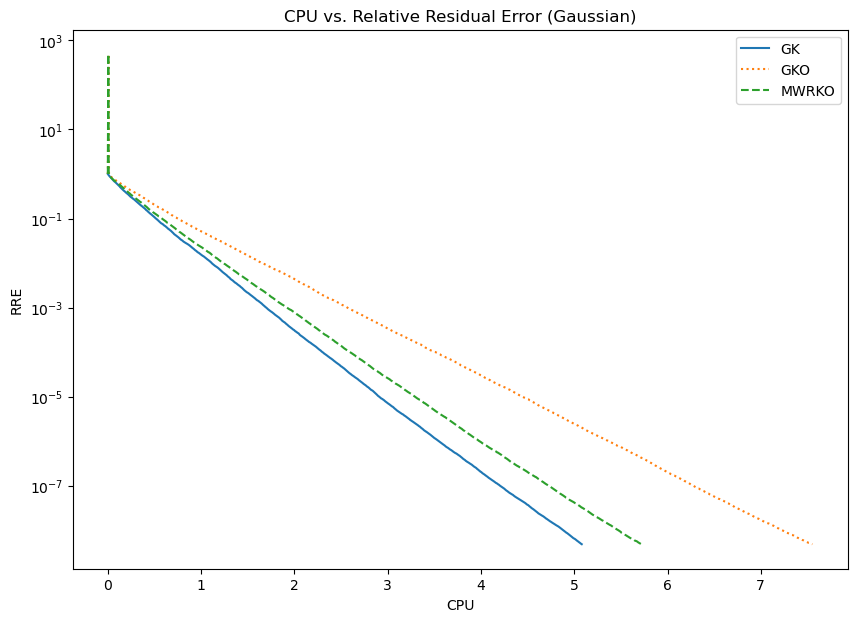

In [10]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_gauss,gk_gaussian[0]), gk_gaussian[1],linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_gauss,gko_gaussian[0]), gko_gaussian[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_gauss,mwrko_gaussian[0]), mwrko_gaussian[1],linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('RRE')
plt.title('CPU vs. Relative Residual Error (Gaussian)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-gauss-cpu.png')

### Experiment 2: Uniform System

$X \sim \text{Unif}(0,\,1)$

In [11]:
#uniform
A = np.random.uniform(size =(5000,500), low = 0, high = 1)
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x

In [12]:
# gk
gk_start_cyclic = process_time()
gk_uniform = method(A,x,y,'GK', 0.5*10**-8)
gk_stop_cyclic = process_time()
# gko
gko_start_cyclic = process_time()
gko_uniform = method(A,x,y,'GKO', 0.5*10**-8)
gko_stop_cyclic = process_time()
# mwrko
mwrko_start_cyclic = process_time()
mwrko_uniform = method(A,x,y,'MWRKO', 0.5*10**-8)
mwrko_stop_cyclic = process_time()

In [13]:
# cpu data
gk_cpu = gk_stop_cyclic - gk_start_cyclic
gko_cpu = gko_stop_cyclic - gko_start_cyclic
mwrko_cpu = mwrko_stop_cyclic - mwrko_start_cyclic

In [14]:
import pandas as pd
df_cpu = pd.DataFrame()
df_cpu['A'] = ['Gaussian', 'Uniform']
df_cpu['GK'] = [gk_cpu_gauss, gk_cpu]
df_cpu['GKO'] = [gko_cpu_gauss, gko_cpu]
df_cpu['MWRKO'] = [mwrko_cpu_gauss, mwrko_cpu]
df_cpu

,A,GK,GKO,MWRKO
0,Gaussian,5.080322,7.553054,5.717540
1,Uniform,5.187392,3.727231,3.003024


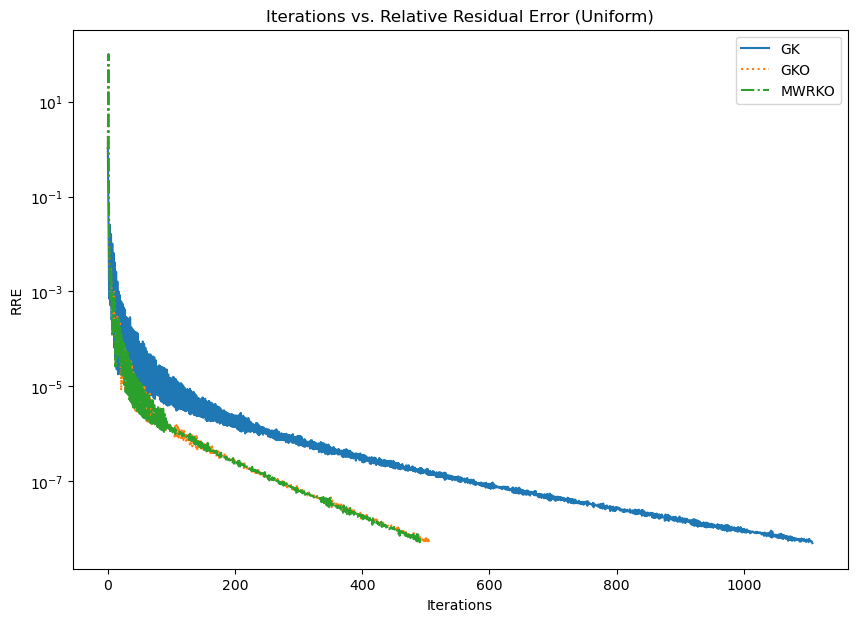

In [15]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_uniform[0]), gko_uniform[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashdot', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('RRE')
plt.title('Iterations vs. Relative Residual Error (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-unif-iter.png')

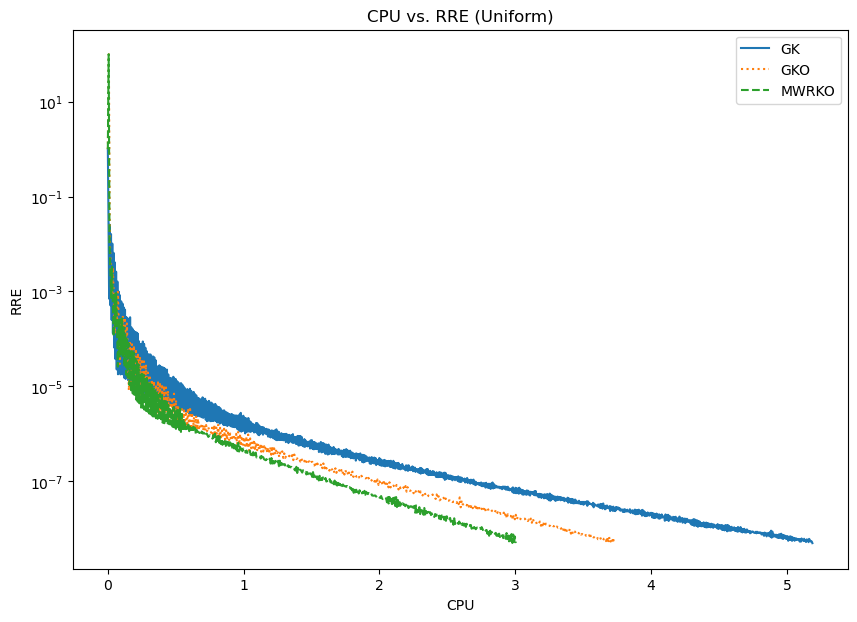

In [17]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu,gk_uniform[0]), gk_uniform[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu,gko_uniform[0]), gko_uniform[1],linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu,mwrko_uniform[0]), mwrko_uniform[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('RRE')
plt.title('CPU vs. RRE (Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-unif-cpu.png')

### 50/50 Gauss-Uniform

In [18]:
#combination
A1 = np.random.rand(2500,500)
A2 = np.random.randn(2500,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x

In [19]:
# gk
gk_start_cyclic_comb = process_time()
gk_comb = method(A,x,y,'GK', 0.5*10**-8)
gk_stop_cyclic_comb = process_time()
# gko
gko_start_cyclic_comb = process_time()
gko_comb = method(A,x,y,'GKO', 0.5*10**-8)
gko_stop_cyclic_comb = process_time()
# mwrko
mwrko_start_cyclic_comb = process_time()
mwrko_comb = method(A,x,y,'MWRKO', 0.5*10**-8)
mwrko_stop_cyclic_comb = process_time()

In [20]:
# cpu data
gk_cpu_comb = gk_stop_cyclic_comb - gk_start_cyclic_comb
gko_cpu_comb = gko_stop_cyclic_comb - gko_start_cyclic_comb
mwrko_cpu_comb = mwrko_stop_cyclic_comb - mwrko_start_cyclic_comb

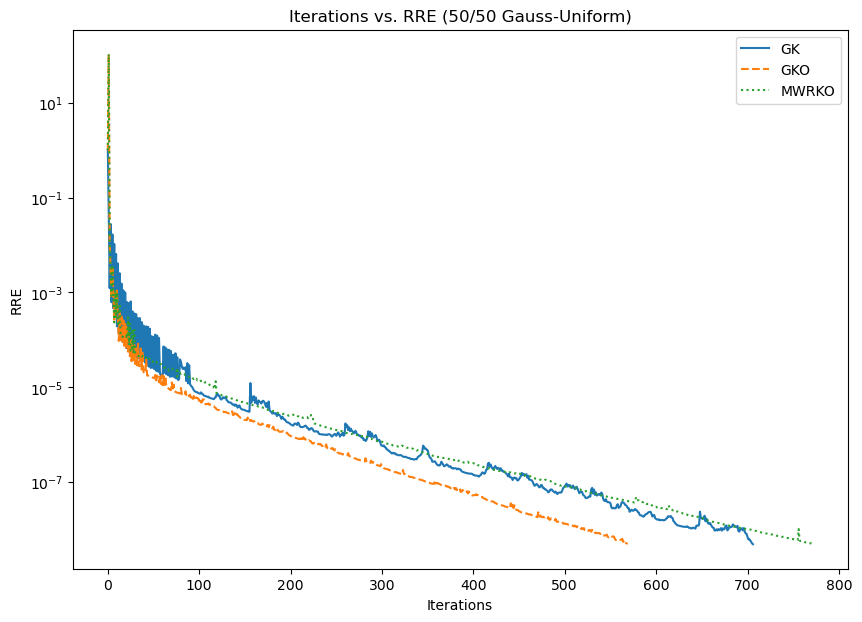

In [40]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_comb[0]), gko_comb[1], linestyle = 'dashed', label = 'GKO')
plt.semilogy(np.arange(mwrko_comb[0]), mwrko_comb[1], linestyle = 'dotted', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('RRE')
plt.title('Iterations vs. RRE (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-comb-iter.png')

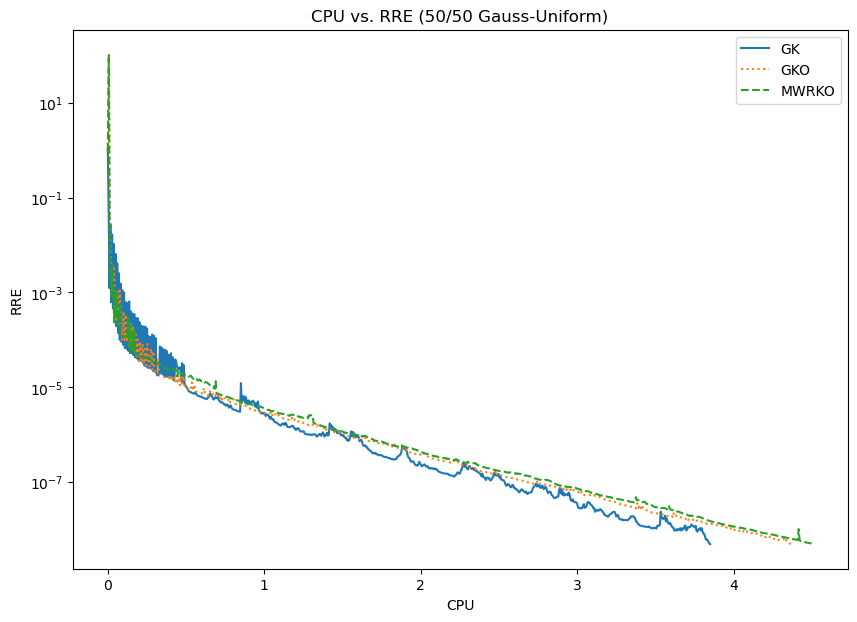

In [41]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_comb,gk_comb[0]), gk_comb[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_comb,gko_comb[0]), gko_comb[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_comb,mwrko_comb[0]), mwrko_comb[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('RRE')
plt.title('CPU vs. RRE (50/50 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-comb-cpu.png')

### 75/25 Gauss-Uniform System

In [23]:
#combination
A1 = np.random.rand(1250,500)
A2 = np.random.randn(3750,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x

In [24]:
# gk
gk_start_cyclic_comb2 = process_time()
gk_comb2 = method(A,x,y,'GK', 0.5*10**-8)
gk_stop_cyclic_comb2 = process_time()
# gko
gko_start_cyclic_comb2 = process_time()
gko_comb2 = method(A,x,y,'GKO', 0.5*10**-8)
gko_stop_cyclic_comb2 = process_time()
# mwrko
mwrko_start_cyclic_comb2 = process_time()
mwrko_comb2 = method(A,x,y,'MWRKO', 0.5*10**-8)
mwrko_stop_cyclic_comb2 = process_time()

In [25]:
# cpu data
gk_cpu_comb2 = gk_stop_cyclic_comb2 - gk_start_cyclic_comb2
gko_cpu_comb2 = gko_stop_cyclic_comb2 - gko_start_cyclic_comb2
mwrko_cpu_comb2 = mwrko_stop_cyclic_comb2 - mwrko_start_cyclic_comb2

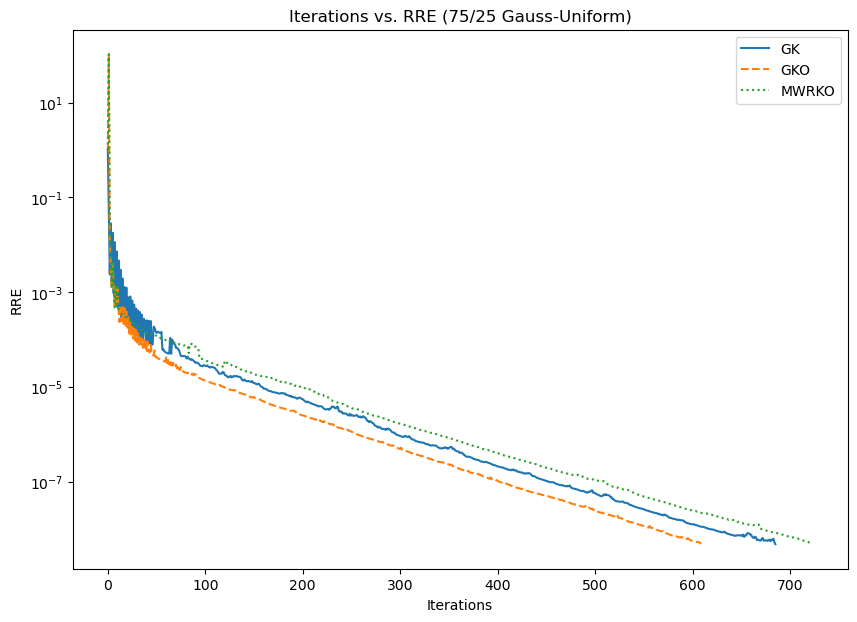

In [42]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_comb2[0]), gk_comb2[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_comb2[0]), gko_comb2[1], linestyle = 'dashed', label = 'GKO')
plt.semilogy(np.arange(mwrko_comb2[0]), mwrko_comb2[1], linestyle = 'dotted', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('RRE')
plt.title('Iterations vs. RRE (75/25 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-comb2-iter.png')

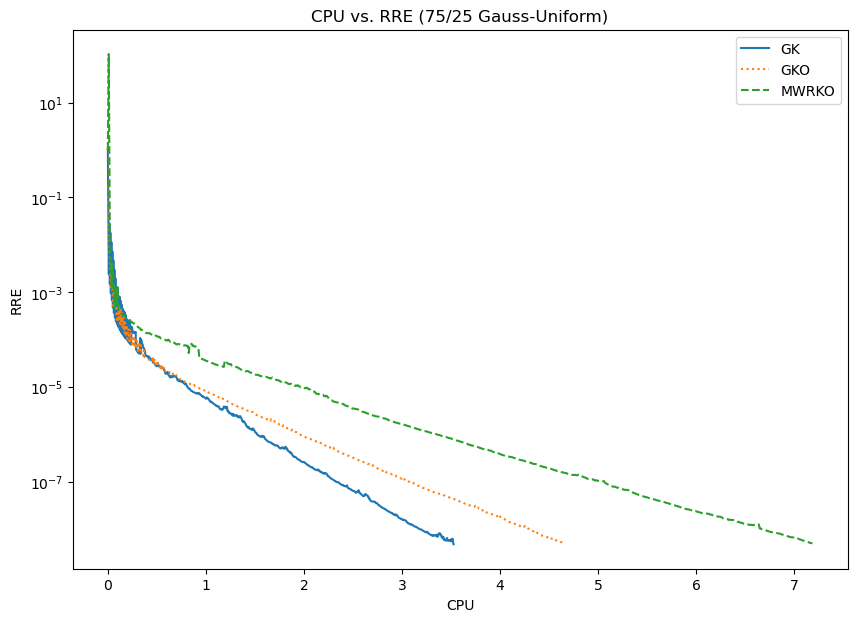

In [43]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_comb2,gk_comb2[0]), gk_comb2[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_comb2,gko_comb2[0]), gko_comb2[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_comb2,mwrko_comb2[0]), mwrko_comb2[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('RRE')
plt.title('CPU vs. RRE (75/25 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-comb2-cpu.png')

### 25/75 Gauss-Uniform

In [28]:
#combination
A1 = np.random.rand(3750,500)
A2 = np.random.randn(1250,500)
A = np.concatenate((A1, A2))
A = normalize(A, axis=1, norm='l2')
x = np.ones(500)
y = A @ x

In [29]:
# gk
gk_start_cyclic_comb3 = process_time()
gk_comb3 = method(A,x,y,'GK', 0.5*10**-8)
gk_stop_cyclic_comb3 = process_time()
# gko
gko_start_cyclic_comb3 = process_time()
gko_comb3 = method(A,x,y,'GKO', 0.5*10**-8)
gko_stop_cyclic_comb3 = process_time()
# mwrko
mwrko_start_cyclic_comb3 = process_time()
mwrko_comb3 = method(A,x,y,'MWRKO', 0.5*10**-8)
mwrko_stop_cyclic_comb3 = process_time()

In [30]:
# cpu data
gk_cpu_comb3 = gk_stop_cyclic_comb3 - gk_start_cyclic_comb3
gko_cpu_comb3 = gko_stop_cyclic_comb3 - gko_start_cyclic_comb3
mwrko_cpu_comb3 = mwrko_stop_cyclic_comb3 - mwrko_start_cyclic_comb3

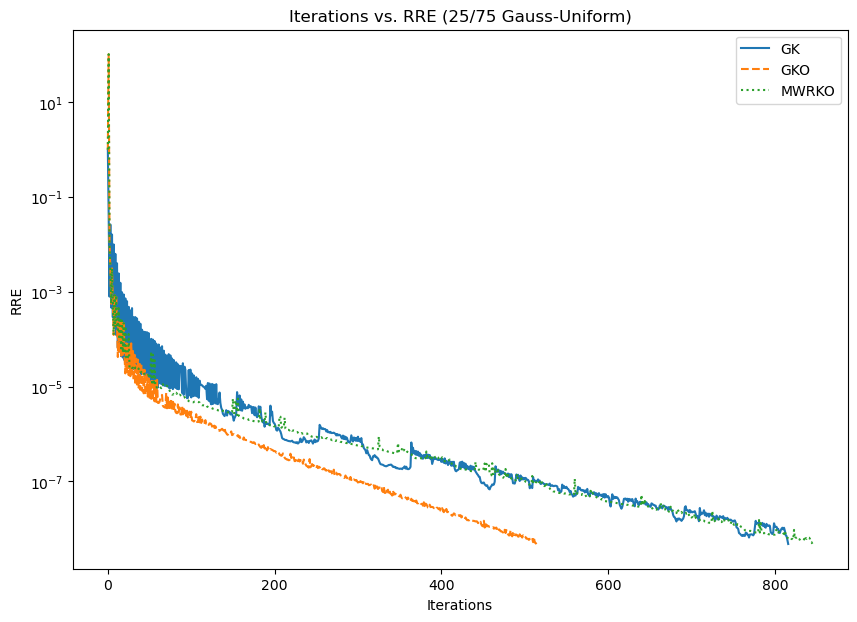

In [44]:
plt.figure(figsize=(10,7))

plt.semilogy(np.arange(gk_comb3[0]), gk_comb3[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.arange(gko_comb3[0]), gko_comb3[1], linestyle = 'dashed', label = 'GKO')
plt.semilogy(np.arange(mwrko_comb3[0]), mwrko_comb3[1], linestyle = 'dotted', label = 'MWRKO')

plt.xlabel('Iterations')
plt.ylabel('RRE')
plt.title('Iterations vs. RRE (25/75 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-comb3-iter.png')

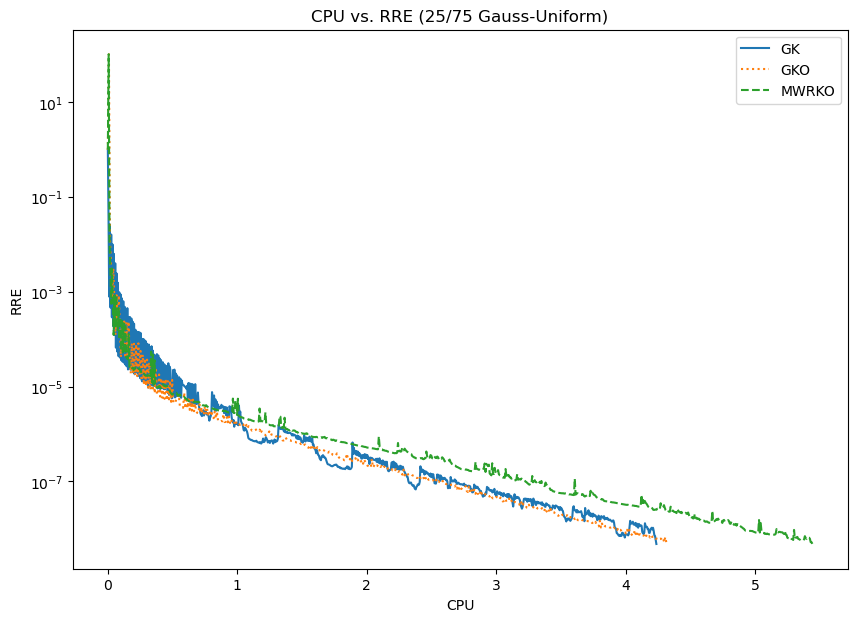

In [45]:
plt.figure(figsize=(10,7))

plt.semilogy(np.linspace(0,gk_cpu_comb3,gk_comb3[0]), gk_comb3[1], linestyle = 'solid', label = 'GK')
plt.semilogy(np.linspace(0,gko_cpu_comb3,gko_comb3[0]), gko_comb3[1], linestyle = 'dotted', label = 'GKO')
plt.semilogy(np.linspace(0,mwrko_cpu_comb3,mwrko_comb3[0]), mwrko_comb3[1], linestyle = 'dashed', label = 'MWRKO')

plt.xlabel('CPU')
plt.ylabel('RRE')
plt.title('CPU vs. RRE (25/75 Gauss-Uniform)')
plt.legend()
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-comb3-cpu.png')

### Overall Results

<Figure size 10000x7000 with 0 Axes>

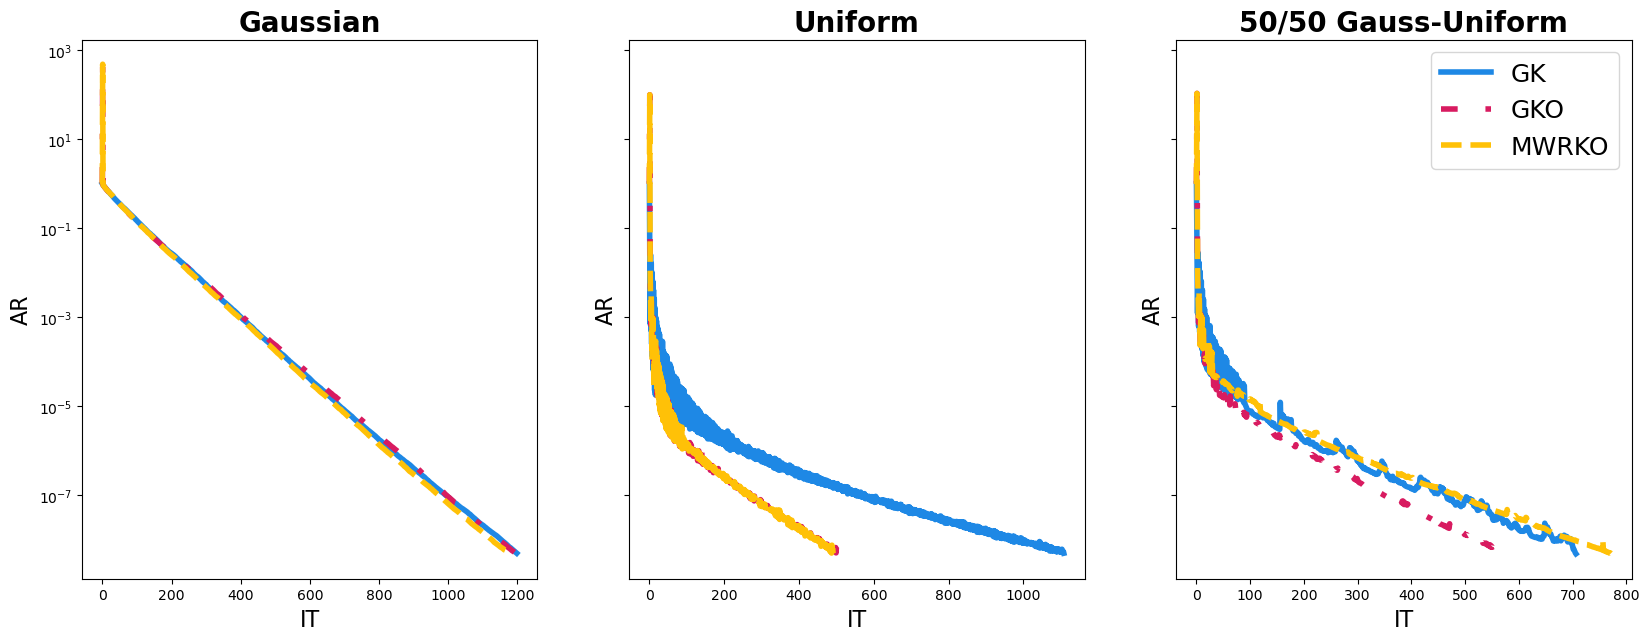

In [46]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('IT', fontsize=16)
ax1.set_ylabel('AR', fontsize=16)

ax2.semilogy(np.arange(gk_uniform[0]), gk_uniform[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.arange(gko_uniform[0]), gko_uniform[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('IT', fontsize=16)
ax2.set_ylabel('AR', fontsize=16)

ax3.semilogy(np.arange(gk_comb[0]), gk_comb[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax3.semilogy(np.arange(gko_comb[0]), gko_comb[1], color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(np.arange(mwrko_comb[0]), mwrko_comb[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('IT', fontsize=16)
ax3.set_ylabel('AR', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-iter.png')
plt.show()

<Figure size 10000x7000 with 0 Axes>

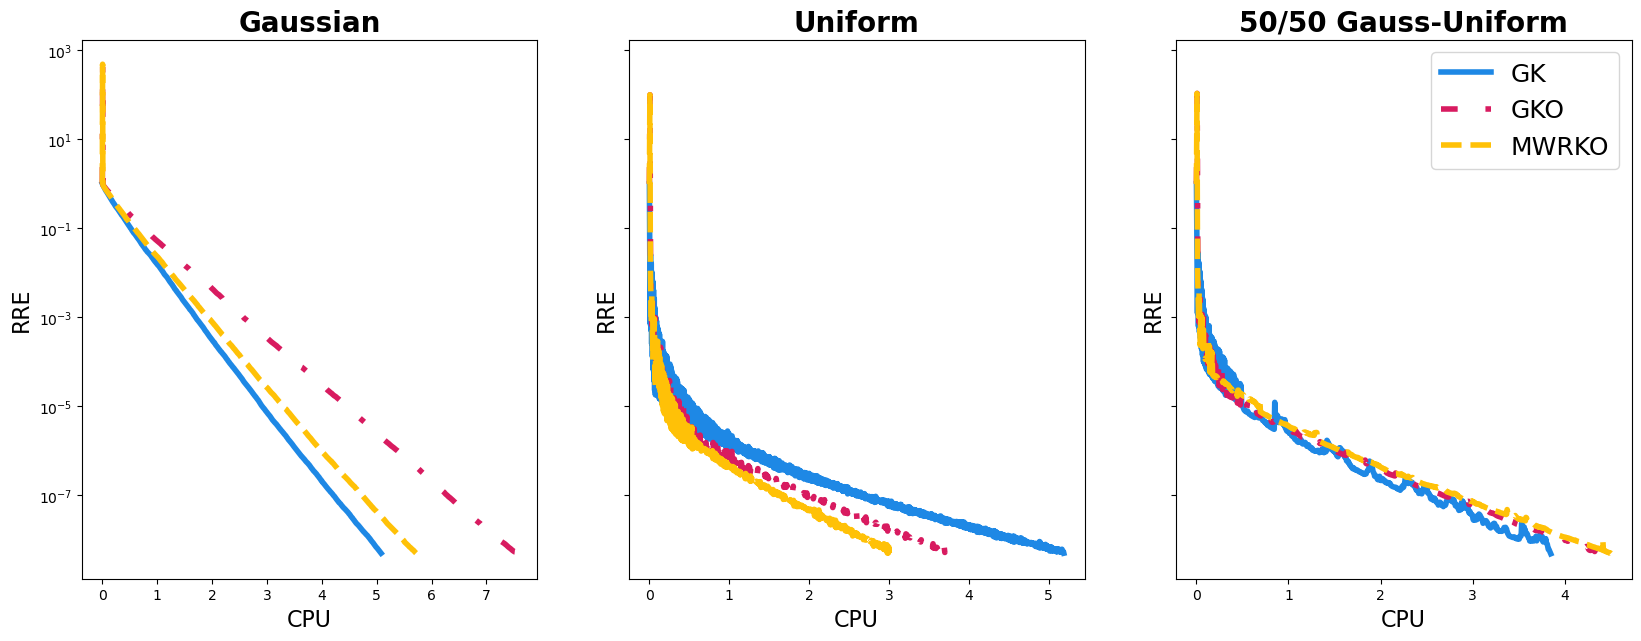

In [48]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.linspace(0,gk_cpu_gauss,gk_gaussian[0]), gk_gaussian[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.linspace(0,gko_cpu_gauss,gko_gaussian[0]), gko_gaussian[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.linspace(0,mwrko_cpu_gauss,mwrko_gaussian[0]), mwrko_gaussian[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('CPU', fontsize=16)
ax1.set_ylabel('RRE', fontsize=16)


ax2.semilogy(np.linspace(0,gk_cpu,gk_uniform[0]), gk_uniform[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.linspace(0,gko_cpu,gko_uniform[0]), gko_uniform[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.linspace(0,mwrko_cpu,mwrko_uniform[0]), mwrko_uniform[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('CPU', fontsize=16)
ax2.set_ylabel('RRE', fontsize=16)

ax3.semilogy(np.linspace(0,gk_cpu_comb,gk_comb[0]), gk_comb[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax3.semilogy(np.linspace(0,gko_cpu_comb,gko_comb[0]), gko_comb[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(np.linspace(0,mwrko_cpu_comb,mwrko_comb[0]), mwrko_comb[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax3.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('CPU', fontsize=16)
ax3.set_ylabel('RRE', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-cpu.png')
plt.show()

<Figure size 10000x7000 with 0 Axes>

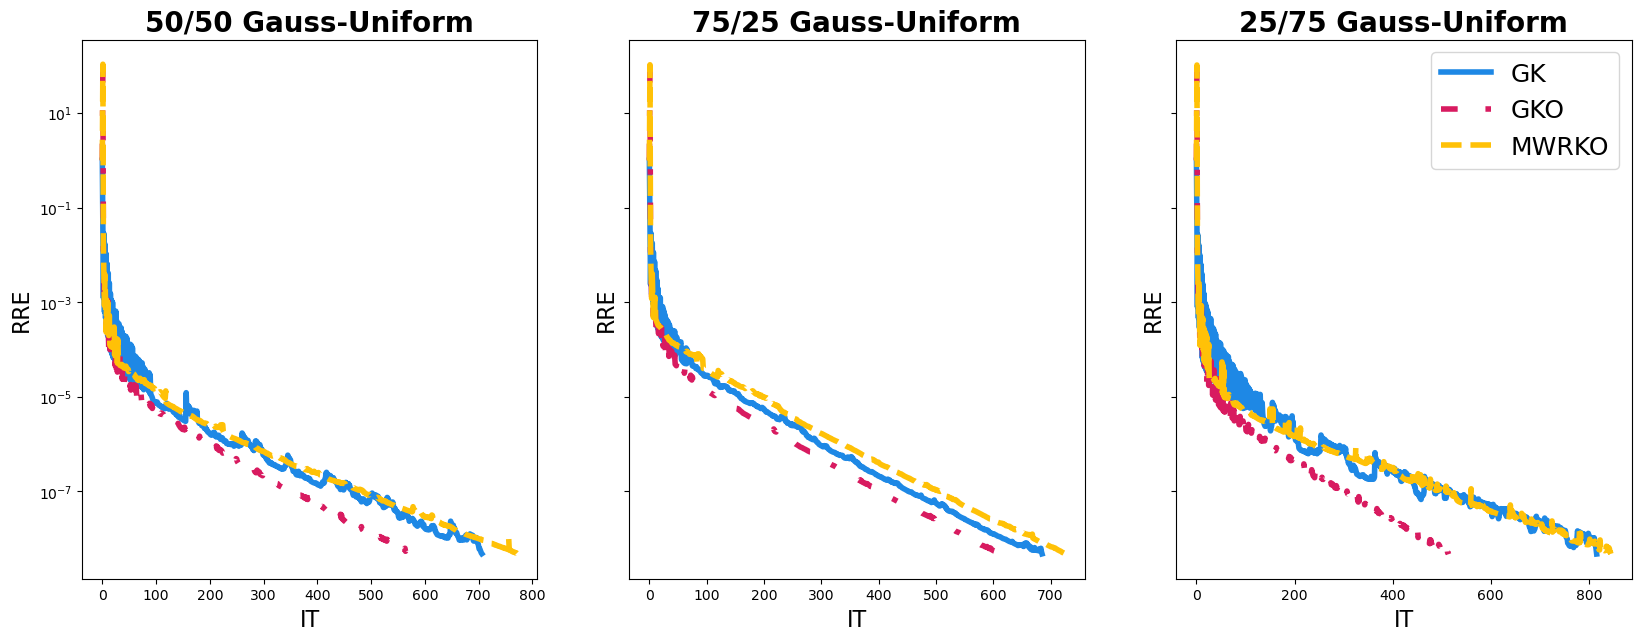

In [49]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.arange(gk_comb[0]), gk_comb[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.arange(gko_comb[0]), gko_comb[1], color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.arange(mwrko_comb[0]), mwrko_comb[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax1.set_xlabel('IT', fontsize=16)
ax1.set_ylabel('RRE', fontsize=16)

ax2.semilogy(np.arange(gk_comb2[0]), gk_comb2[1],  color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.arange(gko_comb2[0]), gko_comb2[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.arange(mwrko_comb2[0]), mwrko_comb2[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('75/25 Gauss-Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('IT', fontsize=16)
ax2.set_ylabel('RRE', fontsize=16)

ax3.semilogy(np.arange(gk_comb3[0]), gk_comb3[1],  color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax3.semilogy(np.arange(gko_comb3[0]), gko_comb3[1], color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(np.arange(mwrko_comb3[0]), mwrko_comb3[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax3.set_title('25/75 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('IT', fontsize=16)
ax3.set_ylabel('RRE', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-iter2.png')
plt.show()

<Figure size 10000x7000 with 0 Axes>

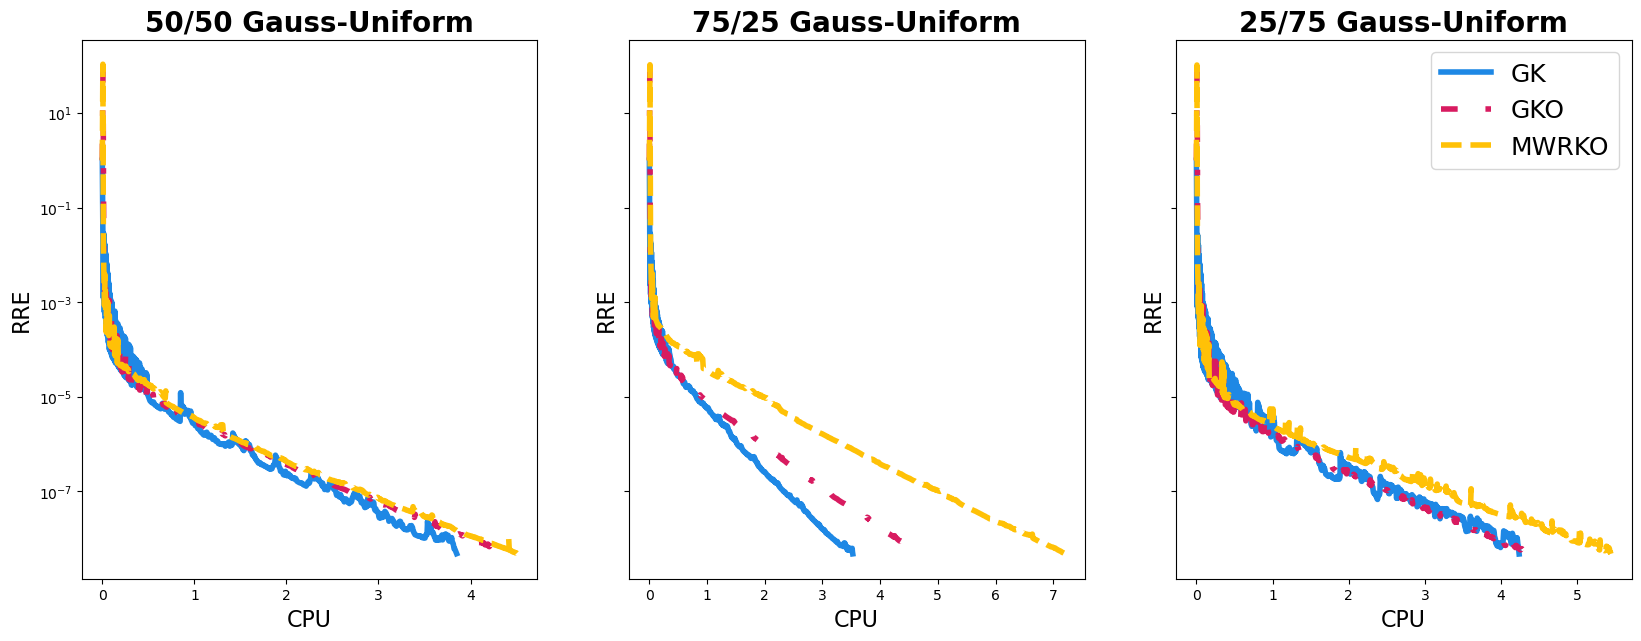

In [51]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, sharey='row', figsize=(20, 7))

ax1.semilogy(np.linspace(0,gk_cpu_comb,gk_comb[0]), gk_comb[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.linspace(0,gko_cpu_comb,gko_comb[0]), gko_comb[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.linspace(0,mwrko_cpu_comb,mwrko_comb[0]), mwrko_comb[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('50/50 Gauss-Uniform', fontsize=20, fontweight="bold")
ax1.set_xlabel('CPU', fontsize=16)
ax1.set_ylabel('RRE', fontsize=16)

ax2.semilogy(np.linspace(0,gk_cpu_comb2,gk_comb2[0]), gk_comb2[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.linspace(0,gko_cpu_comb2,gko_comb2[0]), gko_comb2[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.linspace(0,mwrko_cpu_comb2,mwrko_comb2[0]), mwrko_comb2[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('75/25 Gauss-Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('CPU', fontsize=16)
ax2.set_ylabel('RRE', fontsize=16)

ax3.semilogy(np.linspace(0,gk_cpu_comb3,gk_comb3[0]), gk_comb3[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax3.semilogy(np.linspace(0,gko_cpu_comb3,gko_comb3[0]), gko_comb3[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax3.semilogy(np.linspace(0,mwrko_cpu_comb3,mwrko_comb3[0]), mwrko_comb3[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax3.set_title('25/75 Gauss-Uniform', fontsize=20, fontweight="bold")
ax3.set_xlabel('CPU', fontsize=16)
ax3.set_ylabel('RRE', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-cpu2.png')
plt.show()

In [37]:
df_cpu = pd.DataFrame()
df_cpu['A'] = ['50/50', '75/25', '25/75']
df_cpu['GK'] = [gk_cpu_comb, gk_cpu_comb2, gk_cpu_comb3]
df_cpu['GKO'] = [gko_cpu_comb, gko_cpu_comb2, gko_cpu_comb3]
df_cpu['MWRKO'] = [mwrko_cpu_comb, mwrko_cpu_comb2, mwrko_cpu_comb3]
df_cpu

,A,GK,GKO,MWRKO
0,50/50,3.849400,4.365194,4.502477
1,75/25,3.525273,4.655659,7.183993
2,25/75,4.237025,4.330849,5.441994


<Figure size 10000x7000 with 0 Axes>

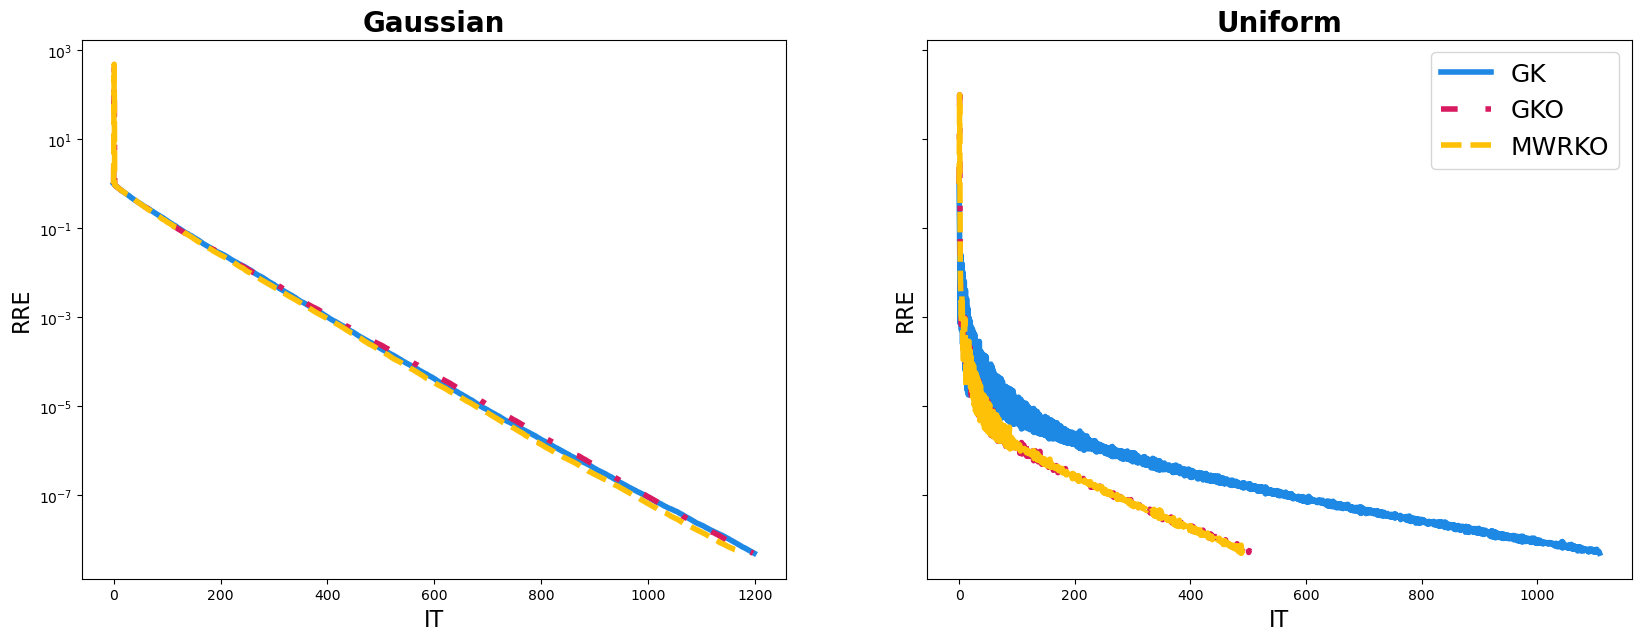

In [52]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey='row', figsize=(20, 7))

ax1.semilogy(np.arange(gk_gaussian[0]), gk_gaussian[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.arange(gko_gaussian[0]), gko_gaussian[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.arange(mwrko_gaussian[0]), mwrko_gaussian[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('IT', fontsize=16)
ax1.set_ylabel('RRE', fontsize=16)

ax2.semilogy(np.arange(gk_uniform[0]), gk_uniform[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.arange(gko_uniform[0]), gko_uniform[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.arange(mwrko_uniform[0]), mwrko_uniform[1], color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('IT', fontsize=16)
ax2.set_ylabel('RRE', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/iter/5000-iter.png')
plt.show()

<Figure size 10000x7000 with 0 Axes>

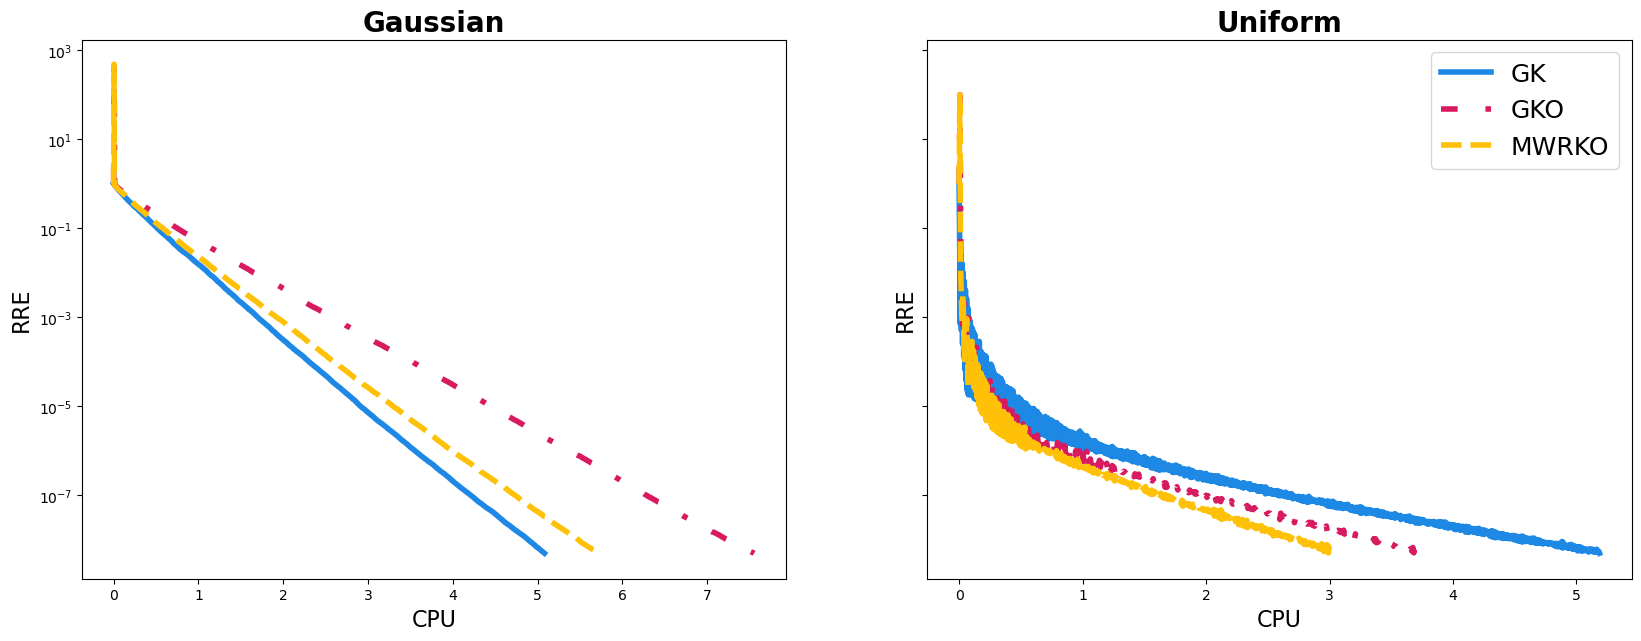

In [53]:
plt.figure(figsize=(100, 70))
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey='row', figsize=(20, 7))

ax1.semilogy(np.linspace(0,gk_cpu_gauss,gk_gaussian[0]), gk_gaussian[1],color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax1.semilogy(np.linspace(0,gko_cpu_gauss,gko_gaussian[0]), gko_gaussian[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax1.semilogy(np.linspace(0,mwrko_cpu_gauss,mwrko_gaussian[0]), mwrko_gaussian[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax1.set_title('Gaussian', fontsize=20, fontweight="bold")
ax1.set_xlabel('CPU', fontsize=16)
ax1.set_ylabel('RRE', fontsize=16)


ax2.semilogy(np.linspace(0,gk_cpu,gk_uniform[0]), gk_uniform[1], color = '#1E88E5', 
             linewidth = 4, linestyle = 'solid', label = 'GK')
ax2.semilogy(np.linspace(0,gko_cpu,gko_uniform[0]), gko_uniform[1],color = '#D81B60', 
             linewidth = 4, linestyle = (0, (3, 5, 1, 5)), label = 'GKO')
ax2.semilogy(np.linspace(0,mwrko_cpu,mwrko_uniform[0]), mwrko_uniform[1],color = '#FFC107',
             linewidth = 4, linestyle = 'dashed', label = 'MWRKO')
ax2.set_title('Uniform', fontsize=20, fontweight="bold")
ax2.set_xlabel('CPU', fontsize=16)
ax2.set_ylabel('RRE', fontsize=16)

plt.legend(fontsize="18")
plt.savefig('../../outputs/synthetic-exp/5000x500/cpu/5000-cpu.png')
plt.show()